# TP 2
## Parte 1 - Filtros Gaussianos
Implementar la función `create_gauss_filter (h, w, k_size, sigma)` para crear filtros gaussianos para filtrado espectral. Debe retornar un filtro gaussiano de tamaño HxW en dominio espacial y su transformada de Fourier.

1. Graficar ambas representaciones para diferentes tamaños de kernel y sigma. Aplicar el filtro una imagen para validar el funcionamiento en el dominio espectral.
2. Comparar el resultado de hacer un filtrado por convolución con el mismo kernel.

In [1]:
import numpy as np
import numpy.fft as fft
import cv2 as cv
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import glob

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

### Filtro Gaussiano

In [2]:
import numpy.fft as fft

def create_gauss_kernel(k_size=15, sigma=5):
    """
    k_size: tamaño del kernel, 3x3, 5x5, etc (cuadrado e impar)  
    sigma: sigma
    Retorna el kernel
    """
    
    gauss = cv.getGaussianKernel(k_size, sigma)
    kernel = np.outer(gauss, gauss)
    kernel = kernel / np.sum(kernel)
    return kernel


def create_gauss_filter(h, w, k_size=15, sigma=3):
    """
    Parámetros:
        h y w: dimensiones del filtro, que deben coincidir con las dimensiones de la imagen que se desea filtrar
        k_size: tamaño del kernel, 3x3, 5x5, etc (cuadrado e impar)  
        sigma: sigma
    Retorna el filtro y su transformada de Fourier (shifted)
    """
    kernel = create_gauss_kernel(k_size, sigma)
    
    # Filtro
    filter = np.zeros((h, w))
    desde_r = int(w/2) - int(k_size/2)
    desde_c = int(h/2) - int(k_size/2)
    for i in range(0, k_size):
        for j in range(0, k_size):
            filter[desde_c + i,desde_r + j] = kernel[i,j]

    # Transformada del filtro (shifted)
    ft = fft.fft2(filter)
    ft = fft.fftshift(ft)

    return filter, ft

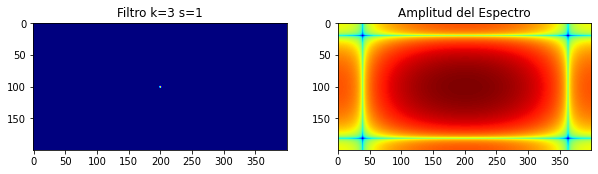

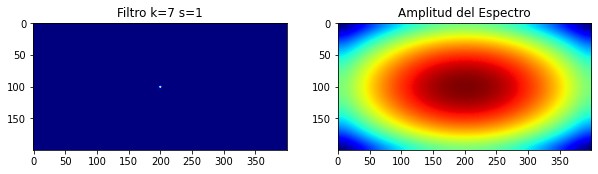

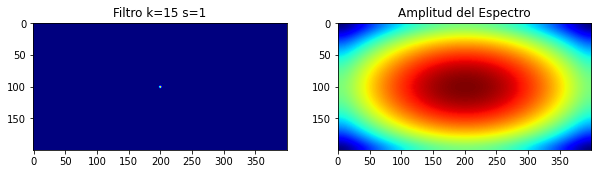

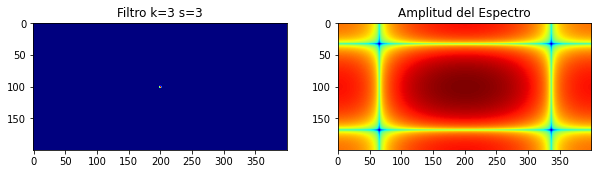

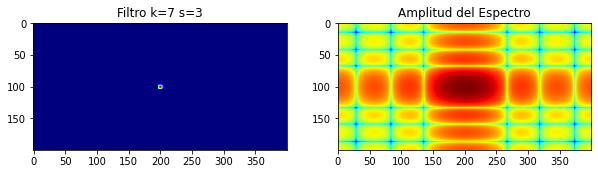

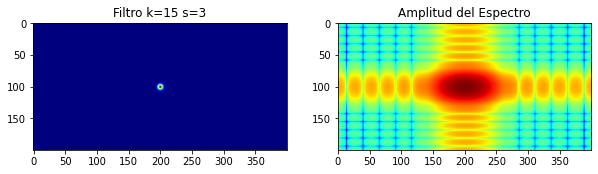

In [3]:
# Algunas muestras de filtros

for sigma in (1,3):
    for k_size in (3,7,15):
        f, ft = create_gauss_filter(200, 400, k_size, sigma)
        magnitude_spectrum = 20*np.log(np.abs(ft)) 
        plt.subplot(121);plt.imshow(f, cmap="jet"); plt.title(f"Filtro k={k_size} s={sigma}")
        plt.subplot(122);plt.imshow(magnitude_spectrum, cmap="jet"); plt.title("Amplitud del Espectro")
        plt.show()

### Filtros en el dominio espectral y el dominio espacial

In [4]:
def aplicar_filtro(img, k_size, sigma):
    height, width = img.shape

    # Filtro en el dominio espectral
    # mediante una multiplicacion punto a punto entre la tf del filtro y la tf de la imagen
    g_filter, g_filter_ft = create_gauss_filter(height, width, k_size, sigma)
    shifted_fft = fft.fftshift(fft.fft2(img))   # transformada de la imagen
    filtered = shifted_fft * g_filter_ft        # transformada * filtro
    f_ishift = fft.ifftshift(filtered)          # inversa de shift
    img_filtered = np.real(fft.ifft2(f_ishift)) # inversa de la transformada (parte real)
    img_filtered = fft.ifftshift(img_filtered)

    # Filtrado por convolución con los mismos parámetros
    img_filtered_conv = cv.GaussianBlur(img,ksize=(k_size, k_size),sigmaX=sigma, sigmaY=sigma)
    
    return img_filtered, img_filtered_conv

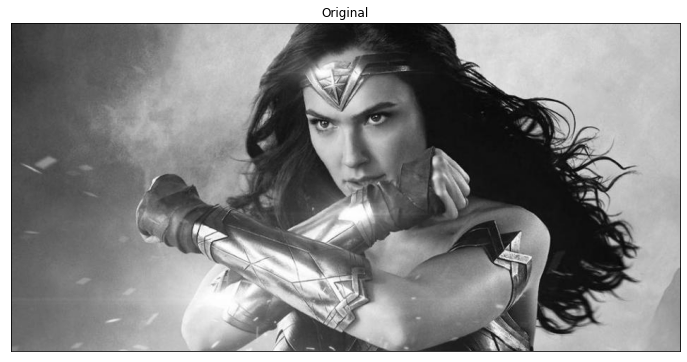

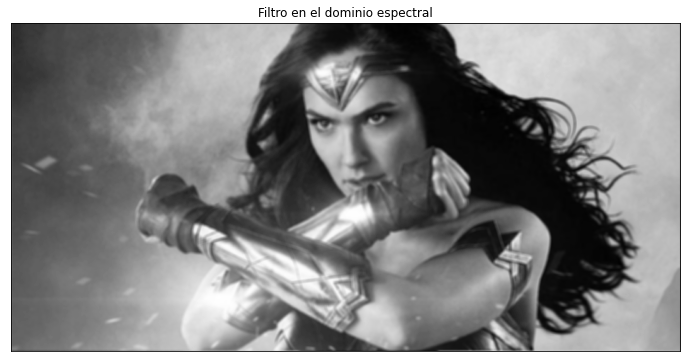

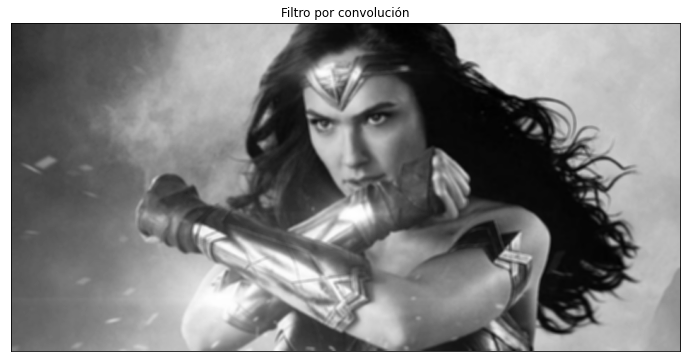

In [5]:
# Aplico los filtros sobre una imagen

img = cv.imread('images/wonderwoman.jpeg', cv.IMREAD_GRAYSCALE)

k_size = 5; sigma = 3
img_filtered, img_filtered_conv = aplicar_filtro(img, k_size, sigma)

# Muestro los resultados
matplotlib.rcParams['figure.figsize'] = (12.0, 12.0)
plt.imshow(img, cmap='gray')
plt.title("Original"); plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(img_filtered, cmap='gray')
plt.title("Filtro en el dominio espectral"); plt.xticks([]), plt.yticks([])
plt.show()        
plt.imshow(img_filtered_conv, cmap='gray')
plt.title("Filtro por convolución"); plt.xticks([]), plt.yticks([])
plt.show()

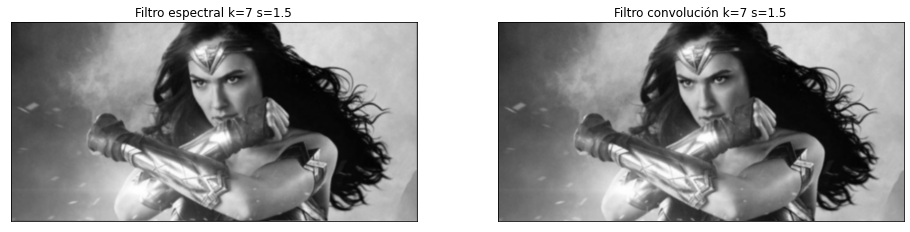

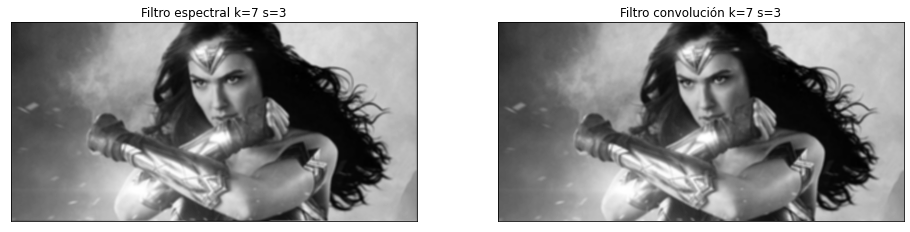

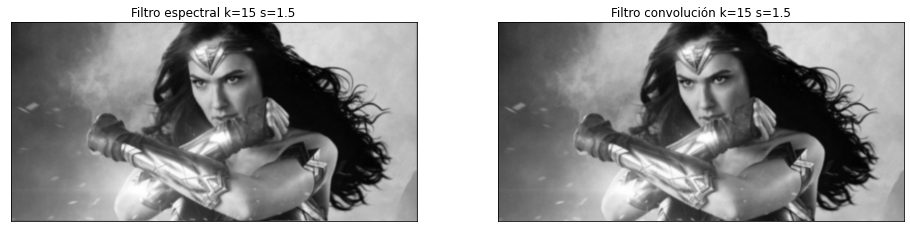

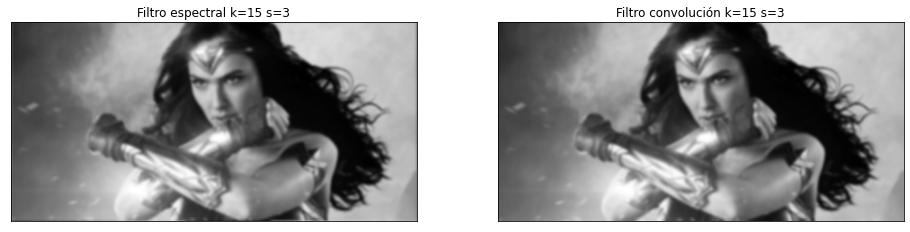

In [6]:
# Aplico los filtros sobre la misma imagen para diferentes valores de kernel y sigma

img = cv.imread('images/wonderwoman.jpeg', cv.IMREAD_GRAYSCALE)

matplotlib.rcParams['figure.figsize'] = (16.0, 16.0)

for k_size in (7, 15):
    for sigma in (1.5, 3):
        img_filtered, img_filtered_conv = aplicar_filtro(img, k_size, sigma)

        # Muestro los resultados
        
        plt.subplot(121);plt.imshow(img_filtered, cmap='gray')
        plt.title(f"Filtro espectral k={k_size} s={sigma}"); plt.xticks([]), plt.yticks([])
        
        plt.subplot(122);plt.imshow(img_filtered_conv, cmap='gray')
        plt.title(f"Filtro convolución k={k_size} s={sigma}"); plt.xticks([]), plt.yticks([])
        
        plt.show()
